In [ ]:
##With suitable example demonstrate the perceptron learning law with its decision region using python.give output in graphical form 

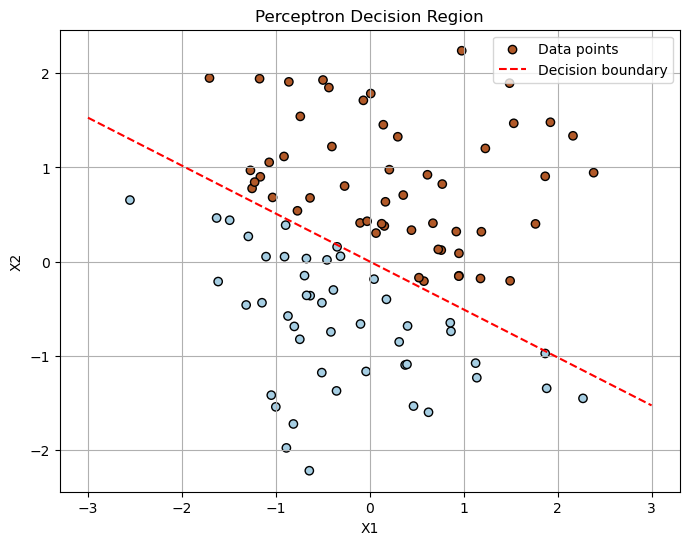

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def fit(self, X, y):
        # Add bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.zeros(X.shape[1])
        
        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
    
    def predict(self, x):
        activation = np.dot(self.weights, x)
        return 1 if activation >= 0 else 0

# Generate synthetic dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.array([0 if x[0] + 2*x[1] < 0 else 1 for x in X])

# Train the perceptron
perceptron = Perceptron()
perceptron.fit(X, y)

# Plot the decision boundary
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron.weights[1] * x_values + perceptron.weights[0]) / perceptron.weights[2]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', label='Data points')
plt.plot(x_values, y_values, 'r--', label='Decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Region')
plt.legend()
plt.grid(True)
plt.show()
